<a href="https://colab.research.google.com/github/adindayudaa17/Student-Performance/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Besar** Mata Kuliah Pembelajaran Mesin

## Identitas:
### Nama: Yulia Adinda yuda

Task

*   Data Preprocessing dan Eksplorasi Data: Lakukan tahap preprocessing data untuk memastikan kualitas dataset, lalu lakukan eksplorasi data untuk mengetahui profil dataset.
*   Pembangunan Model Baseline: Bangun model baseline dengan mendefinisikan parameter dasar dari model yang dikembangkan.
*   Eksplorasi Model: Lakukan eksplorasi model dengan membangun minimal 3 skema model melalui proses hyperparameter tuning atau pemilihan kombinasi parameter yang bervariasi.
*   Evaluasi: Hitung metrik evaluasi beserta visualisasi yang sesuai untuk kasus yang dikerjakan. Lakukan evaluasi terhadap performa masing-masing model dan berikan analisis terkait hasil yang didapat.

# A. Data Preprocessing dan Eksplorasi Data

## A.1. Dataset
Dataset diambil dari repositori pembelajaran mesin (*Machine Learning*) UC Irvine. Dataset ini bernama **Student Performance** yang menggambarkan prestasi siswa sekolah menengah di dua sekolah Portugal, mencakup nilai, data demografis, sosial, dan faktor sekolah. Tersedia dua dataset untuk mata pelajaran Matematika dan Bahasa Portugis. Nilai akhir (G3) sangat berkorelasi dengan nilai sebelumnya (G1 dan G2), sehingga prediksi tanpa G1 dan G2 akan jauh lebih sulit namun lebih bernilai.

Laman dataset tersedia [disini](https://archive.ics.uci.edu/dataset/320/student+performance). Dataset ini memuat data nilai untuk dua mata pelajaran yaitu matematika dan bahasa portugis, namun untuk tugas ini, dataset spesifik yang digunakan adalah nilai mata pelajaran bahasa portugis. Apabila pembaca kode ingin mencoba kode dengan data yang berbeda, maka dapat merubah nama file di kode pada bagian **A.1.1. Konfigurasi dan Impor Dataset**



### A.1.1. Konfigurasi dan impor dataset

#### A.1.1.1. Deklarasi Constant dan Enum dasar

In [ ]:
# Deklarasi basis nama file data beserta ekstensinya dalam suatu constant
NAMA_DEPAN_FILE = "student"
EKSTENSI_FILE = ".csv"

# Deklarasi nama mata pelajaran dalam bentuk Enum (Enumerator)
from enum import StrEnum
class MataPelajaran(StrEnum):
    POR = "por"
    MAT = "mat"

#### A.1.1.2. Fungsi untuk impor dataset
Catatan: Ubah parameter fungsi (saat pemanggilan fungsi) untuk mengganti mata pelajaran terpilih

In [ ]:
# Impor library dasar
import pandas as pd

# Buat fungsi untuk mengimpor dataset berdasarkan mata pelajaran
def impor_dataset(
    mata_pelajaran: MataPelajaran = MataPelajaran.POR
) -> pd.DataFrame:
    print(f"Mata pelajaran terpilih: '{mata_pelajaran}'")
    if mata_pelajaran is None or not isinstance(mata_pelajaran, MataPelajaran):
        raise ValueError("Mata pelajaran tidak boleh kosong dan harus salah satu elemen Enum 'MataPelajaran'")
    dataset = pd.read_csv(f"{NAMA_DEPAN_FILE}-{mata_pelajaran}{EKSTENSI_FILE}", sep=";")
    return dataset

#### A.1.1.3. Impor dataset

In [ ]:
# Impor dataset berdasarkan mata pelajaran terpilih
dataset = impor_dataset()

# Print untuk mengetahui apakah dataset sudah benar terimpor
print(dataset)

Mata pelajaran terpilih: 'por'
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel free

### A.1.2. Analisis Awal Dataset
Pada bagian ini, kita lakukan analisis dasar terkait dataset menggunakan fitur fitur yang terdapat pada pandas. Mengetahui bahwa kolom target adalah *'G3'*, maka dalam fungsi untuk analisis awal dataset, kita akan memberikan *'nama_target'* default yaitu *'G3'*.

#### A.1.2.1. Analisis sederhana
Analisis sederhana meliputi informasi terkait jumlah baris (data) serta kolom (fitur dan target) dari dataset. Dilanjutkan dengan informasi terkait tipe data dan jumlah data null, statistik deskriptif, dan jumlah nilai unik pada setiap kolom. Apabila kolom target diberikan, maka akan diketahui juga distribusi nilai target.

###### A. Deklarasi fungsi analisis sederhana

In [ ]:
from typing import List, Optional, Union

# Fungsi untuk analisis awal dataset
def analisis_sederhana(
    dataset: pd.DataFrame,
    nama_target: Optional[str] = "G3"
):
    print("🧮 Jumlah baris (data):", dataset.shape[0])
    print("📐 Jumlah kolom (fitur + target):", dataset.shape[1])

    if nama_target and nama_target in dataset.columns:
        print("🎯 Nama kolom target:", nama_target)
        print("🎯 Jumlah fitur (tidak termasuk target):", dataset.shape[1] - 1)
    else:
        print("🎯 Target belum ditentukan atau tidak ditemukan.")
        print("🎯 Jumlah fitur (diasumsikan semua kolom):", dataset.shape[1])

    print("\n📊 Tipe data setiap kolom:")
    print(dataset.dtypes)

    print("\n📉 Jumlah data null per kolom:")
    print(dataset.isnull().sum())

    print("\n📈 Statistik deskriptif untuk fitur numerik:")
    print(dataset.describe())

    print("\n🧾 Jumlah nilai unik per kolom:")
    print(dataset.nunique())

    if nama_target and nama_target in dataset.columns:
        print("\n📚 Distribusi nilai target:")
        print(dataset[nama_target].value_counts())


###### B. Proses analisis sederhana

In [ ]:
# Analisis sederhana
analisis_sederhana(dataset)

🧮 Jumlah baris (data): 649
📐 Jumlah kolom (fitur + target): 33
🎯 Nama kolom target: G3
🎯 Jumlah fitur (tidak termasuk target): 32

📊 Tipe data setiap kolom:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

📉 Jumlah data null per kolom:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu     

#### A.1.2.2. Visualisasi Grafik Dataset
Dalam bagian ini, untuk memahami dataset lebih baik, diberikan grafik distribusi nilai yang ada di setiap kolom (baik fitur atau target).

###### A. Deklarasi fungsi grafik distribusi

In [ ]:
from typing import List, Optional
import matplotlib.pyplot as plt
import math

def plot_distribusi_kolom(
    dataset: pd.DataFrame,
    kolom_pengecualian: Optional[List[str]] = None,
    kolom_per_baris: int = 2
) -> None:
    if kolom_pengecualian is None:
        kolom_pengecualian = []

    kolom_terpakai = [col for col in dataset.columns if col not in kolom_pengecualian]
    total = len(kolom_terpakai)
    baris = math.ceil(total / kolom_per_baris)

    fig, axes = plt.subplots(baris, kolom_per_baris, figsize=(kolom_per_baris * 8, baris * 4))
    axes = axes.flatten()  # agar bisa diakses 1 dimensi meskipun baris=1

    for i, kolom in enumerate(kolom_terpakai):
        nilai_unik = dataset[kolom].dropna().unique()
        jumlah_unik = len(nilai_unik)
        value_counts = dataset[kolom].value_counts()
        total_vals = value_counts.sum()

        ax = axes[i]

        # Jika semua nilai bisa di-cast ke integer, urutkan berdasarkan nilainya
        try:
            int_keys = [int(x) for x in value_counts.index]
            sorted_index = sorted(int_keys)
            value_counts = value_counts.loc[sorted_index]
        except:
            # Tidak semua nilai bisa jadi int, biarkan default (sorted by count)
            pass

        if jumlah_unik > 4:
            # Grafik batang
            bars = value_counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
            value_counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
            ax.set_ylabel("Jumlah")
            ax.set_title(f"{kolom}")
            ax.tick_params(axis='x', rotation=45)

            # Maksimum y = 110% dari height tertinggi
            max_height = value_counts.max()
            ax.set_ylim(0, max_height * 1.2)

            # Tambahkan label jumlah dan persentase di atas batang
            for bar, label in zip(bars.patches, value_counts.index):
                height = bar.get_height()
                persen = (height / total_vals) * 100
                anotasi = f'{int(height)}'
                if persen >= 2.5:
                    anotasi += f'\n({persen:.1f}%)'
                ax.annotate(anotasi,
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center', va='bottom',
                            fontsize=9)
        else:
            # Grafik lingkaran
            value_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
            ax.set_ylabel("")
            ax.set_title(f"{kolom}")

    # Kosongkan subplot yang tidak terpakai jika ada
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

###### B. Proses plot distribusi

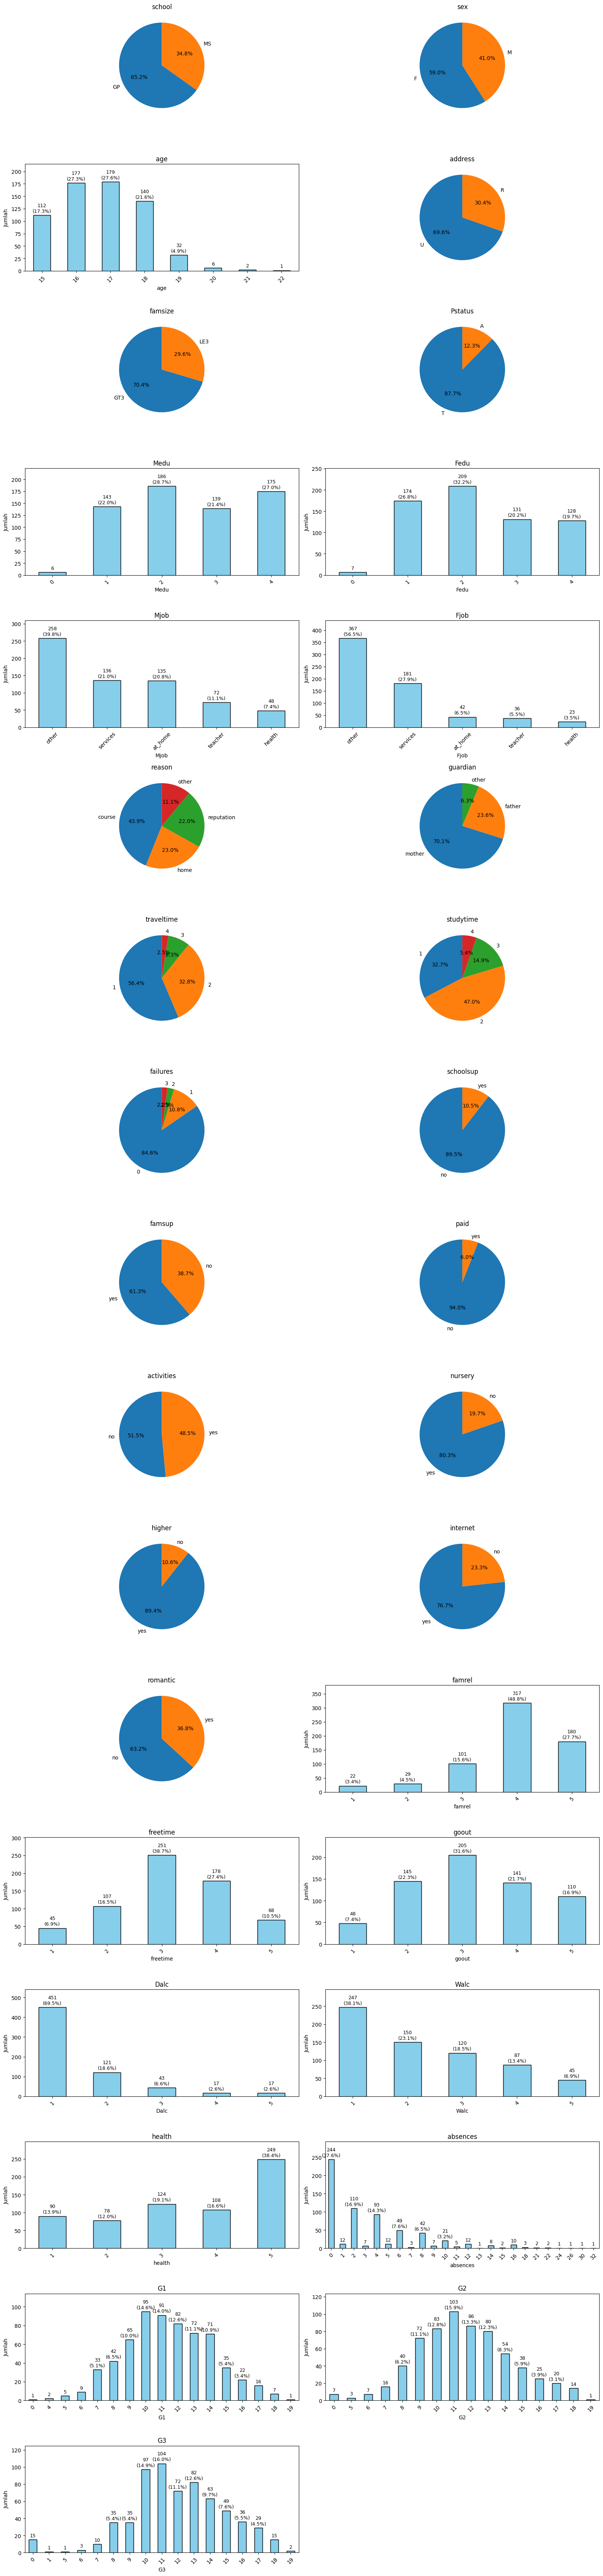

In [ ]:
plot_distribusi_kolom(dataset)

## A.2. Data Preprocessing
Bagian ini akan menjelaskan seluruh proses pemrosesan data yang akan dilakukan sehingga proses pembelajaran mesin dapat memberikan hasil yang lebih baik

### A.2.1. Menghilangkan data yang tidak diperlukan

In [ ]:
# Drop kolom sekolah 'school'
dataset_terproses = dataset.drop('school', axis=1)

# Mengilangkan data null
jumlah_data_null = dataset_terproses.isnull().sum()
if jumlah_data_null.sum() > 0:
    dataset_terproses = dataset_terproses.dropna()

print("Dataset terproses setelah menghilangkan data yang tidak diperlukan")
print(dataset_terproses.head())

Dataset terproses setelah menghilangkan data yang tidak diperlukan
  sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason  \
0   F   18       U     GT3       A     4     4  at_home   teacher  course   
1   F   17       U     GT3       T     1     1  at_home     other  course   
2   F   15       U     LE3       T     1     1  at_home     other   other   
3   F   15       U     GT3       T     4     2   health  services    home   
4   F   16       U     GT3       T     3     3    other     other    home   

   ... famrel  freetime  goout  Dalc Walc health absences  G1  G2  G3  
0  ...      4         3      4     1    1      3        4   0  11  11  
1  ...      5         3      3     1    1      3        2   9  11  11  
2  ...      4         3      2     2    3      3        6  12  13  12  
3  ...      3         2      2     1    1      5        0  14  14  14  
4  ...      4         3      2     1    2      5        0  11  13  13  

[5 rows x 32 columns]


### A.2.2. Label Encoding
Label Encoding adalah teknik mengubah data kategorikal menjadi angka, di mana setiap kategori unik diganti dengan angka integer. Hal ini dilakukan agar algoritma dapat melakukan pembelajaran meskipun dengan data yang formatnya yang tidak sesuai pada awalnya. Label encoding akan dilakukan berdasarkan jenis datanya, apakah datanya nominal (tidak bisa diurutkan) atau ordinal (bisa diurutkan).

#### A.2.2.1 Nominal Label Encoding
Bagian ini akan menunjukkan proses label encoding untuk data nominal yaitu kolom *sex*, *address*, *Pstatus*, *Mjob*, *Fjob*, *reason*, *guardian*, *schoolsup*, *famsup*, *paid*, *activities*, *nursery*, *higher*, *internet*, *romantic*.

In [ ]:
# Impor library
from sklearn.preprocessing import LabelEncoder

# Tentukan kolom
kolom_nominal = [
    "sex",
    "address",
    "Pstatus",
    "Mjob",
    "Fjob",
    "reason",
    "guardian",
    "schoolsup",
    "famsup",
    "paid",
    "activities",
    "nursery",
    "higher",
    "internet",
    "romantic"
]

# Proses encoding
for kolom in kolom_nominal:
    le = LabelEncoder()
    dataset_terproses[kolom] = le.fit_transform(dataset_terproses[kolom])

print("Dataset terproses setelah nominal label encoding")
print(dataset_terproses.head())

Dataset terproses setelah nominal label encoding
   sex  age  address famsize  Pstatus  Medu  Fedu  Mjob  Fjob  reason  ...  \
0    0   18        1     GT3        0     4     4     0     4       0  ...   
1    0   17        1     GT3        1     1     1     0     2       0  ...   
2    0   15        1     LE3        1     1     1     0     2       2  ...   
3    0   15        1     GT3        1     4     2     1     3       1  ...   
4    0   16        1     GT3        1     3     3     2     2       1  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         4   0  11  11  
1       5         3      3     1     1       3         2   9  11  11  
2       4         3      2     2     3       3         6  12  13  12  
3       3         2      2     1     1       5         0  14  14  14  
4       4         3      2     1     2       5         0  11  13  13  

[5 rows x 32 columns]


#### A.2.2.2 Ordinal Label Encoding
Bagian ini akan menunjukkan proses label encoding untuk data ordinal yaitu kolom *famsize*

In [ ]:
# Impor library
from sklearn.preprocessing import OrdinalEncoder

# Tentukan map kolom dan urutan nilai
kolom_urutan_map = {
    "famsize": ["LE3", "GT3"]
}

for kolom, urutan in kolom_urutan_map.items():
    oe = OrdinalEncoder(categories=[urutan])
    dataset_terproses[kolom] = oe.fit_transform(dataset_terproses[[kolom]]).astype(int)

print("Dataset terproses setelah ordinal label encoding")
print(dataset_terproses.head())

Dataset terproses setelah ordinal label encoding
   sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  reason  ...  \
0    0   18        1        1        0     4     4     0     4       0  ...   
1    0   17        1        1        1     1     1     0     2       0  ...   
2    0   15        1        0        1     1     1     0     2       2  ...   
3    0   15        1        1        1     4     2     1     3       1  ...   
4    0   16        1        1        1     3     3     2     2       1  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         4   0  11  11  
1       5         3      3     1     1       3         2   9  11  11  
2       4         3      2     2     3       3         6  12  13  12  
3       3         2      2     1     1       5         0  14  14  14  
4       4         3      2     1     2       5         0  11  13  13  

[5 rows x 32 columns]


### A.2.3. Normalisasi
Normalisasi adalah proses mengubah skala nilai fitur numerik agar berada dalam rentang tertentu yaitu [0-1), sehingga model machine learning—terutama neural network—dapat belajar lebih cepat dan akurat.

In [ ]:
# Impor library
from sklearn.preprocessing import MinMaxScaler

# Deklarasi kolom
kolom = [
    "age"
]

# Penskalaan kolom
for kol in kolom:
    mms = MinMaxScaler()
    dataset_terproses[kol] = mms.fit_transform(dataset_terproses[[kol]])

print("Dataset terproses setelah normalisasi")
print(dataset_terproses.head())

Dataset terproses setelah normalisasi
   sex       age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  reason  \
0    0  0.428571        1        1        0     4     4     0     4       0   
1    0  0.285714        1        1        1     1     1     0     2       0   
2    0  0.000000        1        0        1     1     1     0     2       2   
3    0  0.000000        1        1        1     4     2     1     3       1   
4    0  0.142857        1        1        1     3     3     2     2       1   

   ...  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0  ...       4         3      4     1     1       3         4   0  11  11  
1  ...       5         3      3     1     1       3         2   9  11  11  
2  ...       4         3      2     2     3       3         6  12  13  12  
3  ...       3         2      2     1     1       5         0  14  14  14  
4  ...       4         3      2     1     2       5         0  11  13  13  

[5 rows x 32 columns]


## A.3. Pemisahan Dataset
Sampai saat ini, dataset_terproses masih merupakan kumpulan data fitur dan target. Pada bagian ini, kita akan memisah dataset menjadi x dan y dimana x adalah fitur sedangkan y adalah target.

In [ ]:
X = dataset_terproses.drop("G3", axis=1)
print("X", X, sep="\n")
y = dataset_terproses["G3"]
print("y", y, sep="\n")

X
     sex       age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  reason  \
0      0  0.428571        1        1        0     4     4     0     4       0   
1      0  0.285714        1        1        1     1     1     0     2       0   
2      0  0.000000        1        0        1     1     1     0     2       2   
3      0  0.000000        1        1        1     4     2     1     3       1   
4      0  0.142857        1        1        1     3     3     2     2       1   
..   ...       ...      ...      ...      ...   ...   ...   ...   ...     ...   
644    0  0.571429        0        1        1     2     3     3     2       0   
645    0  0.428571        1        0        1     3     1     4     3       0   
646    0  0.428571        1        1        1     1     1     2     2       0   
647    1  0.285714        1        0        1     3     1     3     3       0   
648    1  0.428571        0        0        1     3     2     3     2       0   

     ...  romantic  famre

## A.4. Exploratory Data Analysis
EDA (Exploratory Data Analysis) adalah proses awal dalam analisis data untuk memahami struktur, pola, dan anomali dalam dataset menggunakan statistik deskriptif dan visualisasi sebelum modeling.

### A.4.1. Correlation Matrix
Matriks korelasi dibuat untuk mengetahui korelasi antar fitur di dalam dataset kita. Membuat matriks korelasi dalam bentuk heatmap membantu kita menemukan pola/struktur di dalam suatu data.

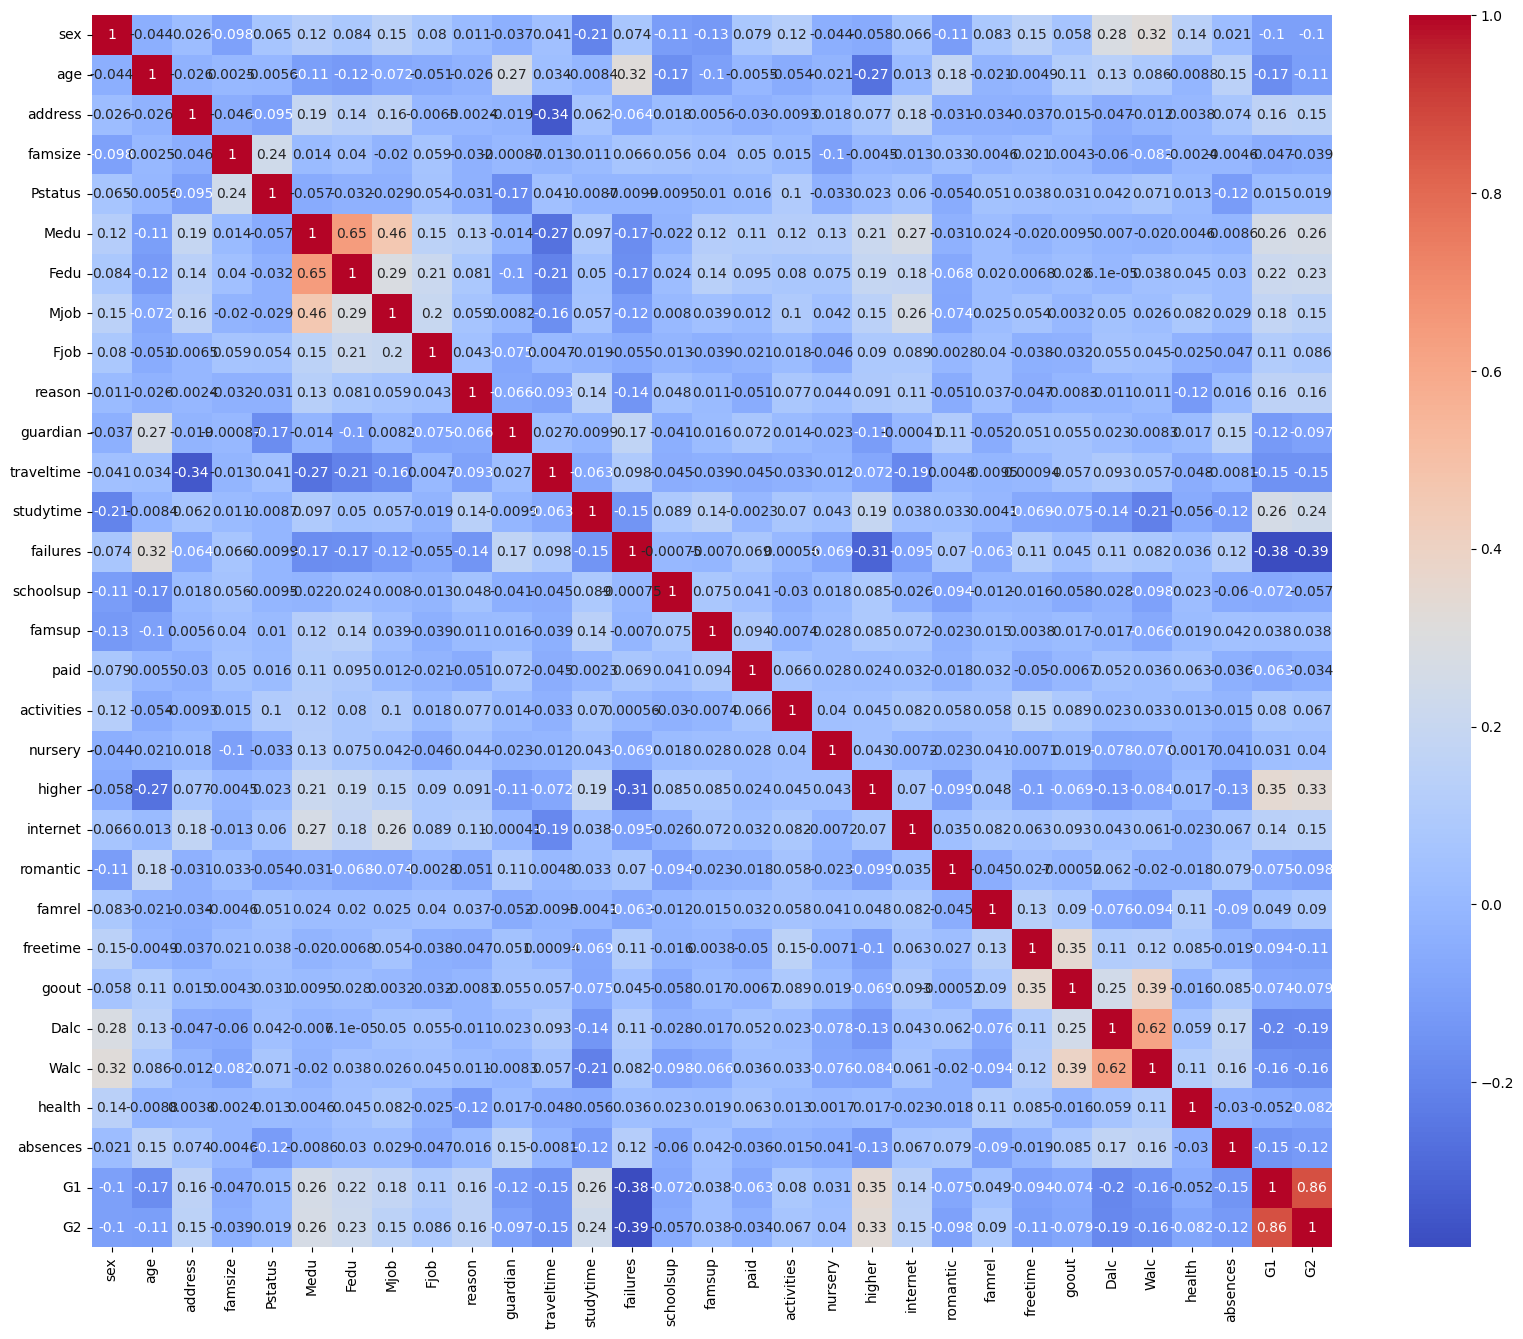

In [ ]:
# Impor library
import seaborn as sns
plt.figure(figsize=(20, 16))
mat_kor = X.corr()
sns.heatmap(mat_kor, annot=True, cmap="coolwarm")
plt.show()

### A.4.2. Principal Component Analysis (PCA)
Principal Component Analysis (PCA) adalah teknik reduksi dimensi yang digunakan untuk mengurangi jumlah fitur (kolom) dalam dataset, mempertahankan informasi/pola utama sebanyak mungkin, dan menghilangkan korelasi antar fitur. Dalam tugas ini, PCA dilakukan untuk mengurangi dimensionalitas fitur namun dengan mempertahankan 95% varian dalam dataset.

In [ ]:
# Impor library
from sklearn.decomposition import PCA

# Deklarasikan pca dengan 95% varian
pca = PCA(n_components=0.95)

# Proses PCA
X_pca = pca.fit_transform(X)
print(f"Jumlah kolom fitur | awal: {len(X.columns)}, tersisa: {len(X_pca[0])}")
print(X_pca)

Jumlah kolom fitur | awal: 31, tersisa: 15
[[ 3.01939501 -7.198483   -0.48229174 ...  0.6880934  -0.37433931
   0.3014007 ]
 [-0.93091843 -2.74236115 -2.69123305 ...  0.18315758 -1.19081324
  -0.15827686]
 [ 1.769951    1.85387421 -2.09910466 ...  0.16933907 -0.99957871
  -0.09331979]
 ...
 [ 2.11913901  0.62949135 -2.63929376 ... -0.35185537  0.2636732
  -0.11173134]
 [ 3.19298911 -1.34324594  1.49174591 ... -0.65652831 -0.01615952
   0.98688392]
 [ 0.92634286 -1.37816544  1.65554468 ...  0.29811844  1.56592166
   0.07499526]]


## A.5. Pemisahan Dataset Train dan Test
Dataset train diberikan suffix *'_tr'* sedangkan dataset test diberikan suffix *'_ts'*

In [ ]:
# Impor library
from sklearn.model_selection import train_test_split

# Pisah dataset
X_tr, X_ts, y_tr, y_ts = train_test_split(X_pca, y, test_size=0.2)

# Pengujian

In [ ]:
# Import Library
from pydantic import BaseModel
from typing import Optional
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Deklarasi model data untuk menyimpan metric performa model
class Metric(BaseModel):
    nilai:float
    perubahan_baseline:Optional[float] = None
    perubahan_untuned:Optional[float] = None

# Pengujian 1: Regression Learning
Hasil pengujian akan selalu diberikan suffix dalam format _xx_yy. Bagian xx menyatakan model yang digunakan (lr untuk Linear Regression, rf untuk Random Forest, dan gb untuk gradien Boost). Sedangkan bagian yy menandakan apakah model tersebut adalah model dasar/untuned (ut) atau model hasil tuning (tu). Untuk model baseline, komponen yy tidak akan diberikan.


## Catatan Untuk Evaluasi Performa
Untuk pengujian 1 dengan regression learning, performa model akan diukur dari tiga hal yaitu

*   Mean Absolute Error (MAE)
*   Mean Squared Error (MSE)
*   Root Mean Squared Error (RMSE)
*   R2 Score (Coefficient of Determination)





In [ ]:
# Impor library
from enum import StrEnum
from pydantic import BaseModel
from typing import Dict

# Deklarasi Enum untuk tipe model regresi
class TipeModelRegresi(StrEnum):
    BASELINE = "baseline"
    UNTUNED = "untuned"
    TUNED = "tuned"

# Deklarasi model data untuk menyimpan performa model regresi
class PerformaModelRegresi(BaseModel):
    mae:Metric
    mse:Metric
    rmse:Metric
    r2:Metric

# Deklarasi model data untuk spesifikasi model regresi
class SpesifikasiModelRegresi(BaseModel):
    tipe:TipeModelRegresi
    performa:PerformaModelRegresi

# Inisialisasi map untuk menyimpan seluruh performa model regresi
spesifikasi_model_regresi:Dict[str, SpesifikasiModelRegresi] = {}

## B. Pembuatan Model Baseline
Model baseline ini akan dianggap sebagai skema 0, yang nantinya akan dikembangkan melalui eksplorasi model pada bagian C

In [ ]:
# Impor library
from sklearn.linear_model import LinearRegression

# Inisialisasi skema 1
lr = LinearRegression()

# Model fitting
lr.fit(X_tr, y_tr)

# Prediksi
y_pr_lr = lr.predict(X_ts)

# Evaluasi metric MAE
mae_lr = mean_absolute_error(y_ts, y_pr_lr)
metric_mae_lr = Metric(nilai=mae_lr)

# Evaluasi metric MSE
mse_lr = mean_squared_error(y_ts, y_pr_lr)
metric_mse_lr = Metric(nilai=mse_lr)

# Evaluasi metric RMSE
rmse_lr = root_mean_squared_error(y_ts, y_pr_lr)
metric_rmse_lr = Metric(nilai=rmse_lr)

# Evaluasi metric R2
r2_lr = r2_score(y_ts, y_pr_lr)
metric_r2_lr = Metric(nilai=r2_lr)

# Tambahkan performa ke map
performa_lr = PerformaModelRegresi(
    mae=metric_mae_lr,
    mse=metric_mse_lr,
    rmse=metric_rmse_lr,
    r2=metric_r2_lr
)
spesifikasi_model_regresi["Baseline Linear Regression"] = SpesifikasiModelRegresi(
    tipe=TipeModelRegresi.BASELINE,
    performa=performa_lr
)

# Tunjukkan performa model
print(
    f"Performa model Untuned Random Forest | "
    f"MAE={mae_lr:.4f}, "
    f"MSE={mse_lr:.4f}, "
    f"RMSE={rmse_lr:.4f}, "
    f"R2={r2_lr:.4f}, "
)

Performa model Untuned Random Forest | MAE=0.8717, MSE=2.0012, RMSE=1.4147, R2=0.8328, 


## C. Eksplorasi Model

### C.1. Skema 1: Random Forest

In [ ]:
# Impor library
from sklearn.ensemble import RandomForestRegressor

#### C.1.1. Skema 1a: Untuned Random Forest

In [ ]:
# Deklarasi model
rf_ut = RandomForestRegressor()

# Model fitting
rf_ut.fit(X_tr, y_tr)

# Prediksi
y_pr_rf_ut = rf_ut.predict(X_ts)

# Evaluasi metric MAE
mae_rf_ut = mean_absolute_error(y_ts, y_pr_rf_ut)
metric_mae_rf_ut = Metric(
    nilai=mae_rf_ut,
    perubahan_baseline=((mae_rf_ut-mae_lr)/mae_lr)*100
)

# Evaluasi metric MSE
mse_rf_ut = mean_squared_error(y_ts, y_pr_rf_ut)
metric_mse_rf_ut = Metric(
    nilai=mse_rf_ut,
    perubahan_baseline=((mse_rf_ut-mse_lr)/mse_lr)*100
)

# Evaluasi metric RMSE
rmse_rf_ut = root_mean_squared_error(y_ts, y_pr_rf_ut)
metric_rmse_rf_ut = Metric(
    nilai=rmse_rf_ut,
    perubahan_baseline=((rmse_rf_ut-rmse_lr)/rmse_lr)*100
)

# Evaluasi metric R2
r2_rf_ut = r2_score(y_ts, y_pr_rf_ut)
metric_r2_rf_ut = Metric(
    nilai=r2_rf_ut,
    perubahan_baseline=((r2_rf_ut-r2_lr)/r2_lr)*100
)

# Tambahkan performa ke map
performa_rf_ut = PerformaModelRegresi(
    mae=metric_mae_rf_ut,
    mse=metric_mse_rf_ut,
    rmse=metric_rmse_rf_ut,
    r2=metric_r2_rf_ut
)
spesifikasi_model_regresi["Untuned Random Forest"] = SpesifikasiModelRegresi(
    tipe=TipeModelRegresi.UNTUNED,
    performa=performa_rf_ut
)

# Tunjukkan performa model
print(
    f"Performa model Untuned Random Forest | "
    f"MAE={mae_rf_ut:.4f} ({metric_mae_rf_ut.perubahan_baseline:.2f}% Baseline), "
    f"MSE={mse_rf_ut:.4f} ({metric_mse_rf_ut.perubahan_baseline:.2f}% Baseline), "
    f"RMSE={rmse_rf_ut:.4f} ({metric_rmse_rf_ut.perubahan_baseline:.2f}% Baseline), "
    f"R2={r2_rf_ut:.4f} ({metric_r2_rf_ut.perubahan_baseline:.2f}% Baseline), "
)

Performa model Untuned Random Forest | MAE=1.0516 (20.64% Baseline), MSE=2.5996 (29.90% Baseline), RMSE=1.6123 (13.97% Baseline), R2=0.7828 (-6.00% Baseline), 


#### C.1.2. Skema 1b: Tuned Random Forest

In [ ]:
# Impor library
from sklearn.model_selection import GridSearchCV

# Parameter map untuk hyperparameter tuning
params_rf_tu = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Hyperparameter tuning dengan GridSearch
grid_rf_tu = GridSearchCV(RandomForestRegressor(), params_rf_tu, cv=5)
grid_rf_tu.fit(X_tr, y_tr)

# Penentuan model terbaik
rf_tu = grid_rf_tu.best_estimator_

# Prediksi
y_pr_rf_tu = rf_tu.predict(X_ts)

# Evaluasi metric MAE
mae_rf_tu = mean_absolute_error(y_ts, y_pr_rf_tu)
metric_mae_rf_tu = Metric(
    nilai=mae_rf_tu,
    perubahan_baseline=((mae_rf_tu-mae_lr)/mae_lr)*100,
    perubahan_untuned=((mae_rf_ut-mae_rf_tu)/mae_rf_ut)*100
)

# Evaluasi metric MSE
mse_rf_tu = mean_squared_error(y_ts, y_pr_rf_tu)
metric_mse_rf_tu = Metric(
    nilai=mse_rf_tu,
    perubahan_baseline=((mse_rf_tu-mse_lr)/mse_lr)*100,
    perubahan_untuned=((mse_rf_ut-mse_rf_tu)/mse_rf_ut)*100
)

# Evaluasi metric RMSE
rmse_rf_tu = root_mean_squared_error(y_ts, y_pr_rf_tu)
metric_rmse_rf_tu = Metric(
    nilai=rmse_rf_tu,
    perubahan_baseline=((rmse_rf_tu-rmse_lr)/rmse_lr)*100,
    perubahan_untuned=((rmse_rf_ut-rmse_rf_tu)/rmse_rf_ut)*100
)

# Evaluasi metric R2
r2_rf_tu = r2_score(y_ts, y_pr_rf_tu)
metric_r2_rf_tu = Metric(
    nilai=r2_rf_tu,
    perubahan_baseline=((r2_rf_tu-r2_lr)/r2_lr)*100,
    perubahan_untuned=((r2_rf_ut-r2_rf_tu)/r2_rf_ut)*100
)

# Tambahkan performa ke map
performa_rf_tu = PerformaModelRegresi(
    mae=metric_mae_rf_tu,
    mse=metric_mse_rf_tu,
    rmse=metric_rmse_rf_tu,
    r2=metric_r2_rf_tu
)
spesifikasi_model_regresi["Tuned Random Forest"] = SpesifikasiModelRegresi(
    tipe=TipeModelRegresi.TUNED,
    performa=performa_rf_tu
)

# Tunjukkan performa model
print(
    f"Performa model Tuned Random Forest | "
    f"MAE={mae_rf_tu:.4f} ({metric_mae_rf_tu.perubahan_baseline:.2f}% Baseline), "
    f"MSE={mse_rf_tu:.4f} ({metric_mse_rf_tu.perubahan_baseline:.2f}% Baseline), "
    f"RMSE={rmse_rf_tu:.4f} ({metric_rmse_rf_tu.perubahan_baseline:.2f}% Baseline), "
    f"R2={r2_rf_tu:.4f} ({metric_r2_rf_tu.perubahan_baseline:.2f}% Baseline), "
)

Performa model Tuned Random Forest | MAE=1.0192 (16.92% Baseline), MSE=2.4855 (24.20% Baseline), RMSE=1.5766 (11.44% Baseline), R2=0.7924 (-4.86% Baseline), 


### C.2. Skema 2: Gradient Boosting

In [ ]:
# Impor library
from sklearn.ensemble import GradientBoostingRegressor

#### C.2.1 Skema 2a: Base Gradient Boosting

In [ ]:
# Deklarasi model
gb_bs = GradientBoostingRegressor()

# Model fitting
gb_bs.fit(X_tr, y_tr)

# Prediksi
y_pr_gb_bs = gb_bs.predict(X_ts)

# Evaluasi performa singkat
mae_gb_bs = mean_absolute_error(y_ts, y_pr_gb_bs)
mse_gb_bs = mean_squared_error(y_ts, y_pr_gb_bs)
r2_gb_bs = r2_score(y_ts, y_pr_gb_bs)
print(f"Hasil pengujian model Base Gradient Boosting | MAE={mae_gb_bs:.4f}, MSE={mse_gb_bs:.4f}, R2={r2_gb_bs:.4f}")

Hasil pengujian model Base Gradient Boosting | MAE=0.9454, MSE=2.2058, R2=0.8157


#### C.2.2. Skema 2b: Tuned Gradient Boosting

In [ ]:
# Impor library
from sklearn.model_selection import GridSearchCV

# Parameter map untuk hyperparameter tuning
params_gb_tu = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10]
}

# Hyperparameter tuning dengan GridSearch
grid_gb_tu = GridSearchCV(GradientBoostingRegressor(), params_gb_tu, cv=5)
grid_gb_tu.fit(X_tr, y_tr)

# Penentuan model terbaik
gb_tu = grid_gb_tu.best_estimator_

# Prediksi
y_pr_gb_tu = gb_tu.predict(X_ts)

# Evaluasi performa singkat
mae_gb_tu = mean_absolute_error(y_ts, y_pr_gb_tu)
mse_gb_tu = mean_squared_error(y_ts, y_pr_gb_tu)
r2_gb_tu = r2_score(y_ts, y_pr_gb_tu)
print(f"Hasil pengujian model Tuned Gradien Boosting | MAE={mae_gb_tu:.4f}, MSE={mse_gb_tu:.4f}, R2={r2_gb_tu:.4f}")

Hasil pengujian model Tuned Gradien Boosting | MAE=0.9431, MSE=2.1956, R2=0.8166


### C.3. Skema 3: Extreme Gradient Boosting (XGBoost)

In [ ]:
from xgboost import XGBRegressor

#### C.3.1 Skema 3a: Base Extreme Gradient Boosting (XGBoost)

In [ ]:
# Deklarasi model
xgb_bs = XGBRegressor(device="cuda")

# Model fitting
xgb_bs.fit(X_tr, y_tr)

# Prediksi
y_pr_xgb_bs = xgb_bs.predict(X_ts)

# Evaluasi performa singkat
mae_xgb_bs = mean_absolute_error(y_ts, y_pr_xgb_bs)
mse_xgb_bs = mean_squared_error(y_ts, y_pr_xgb_bs)
r2_xgb_bs = r2_score(y_ts, y_pr_xgb_bs)
print(f"Hasil pengujian model Base Extreme Gradient Boosting | MAE={mae_xgb_bs:.4f}, MSE={mse_xgb_bs:.4f}, R2={r2_xgb_bs:.4f}")

Hasil pengujian model Base Extreme Gradient Boosting | MAE=1.2134, MSE=3.4825, R2=0.7091


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:01:50] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


#### C.3.2 Skema 3b: Tuned Extreme Gradient Boosting (XGBoost)

In [ ]:
# Impor library
from sklearn.model_selection import GridSearchCV

# Parameter map untuk hyperparameter tuning
params_xgb_tu = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10]
}

# Hyperparameter tuning dengan GridSearch
grid_xgb_tu = GridSearchCV(XGBRegressor(device="cuda"), params_xgb_tu, cv=5)
grid_xgb_tu.fit(X_tr, y_tr)

# Penentuan model terbaik
xgb_tu = grid_xgb_tu.best_estimator_

# Prediksi
y_pr_xgb_tu = xgb_tu.predict(X_ts)

# Evaluasi performa singkat
mae_xgb_tu = mean_absolute_error(y_ts, y_pr_xgb_tu)
mse_xgb_tu = mean_squared_error(y_ts, y_pr_xgb_tu)
r2_xgb_tu = r2_score(y_ts, y_pr_xgb_tu)
print(f"Hasil pengujian model Tuned Extreme Gradien Boosting | MAE={mae_xgb_tu:.4f}, MSE={mse_xgb_tu:.4f}, R2={r2_xgb_tu:.4f}")

Hasil pengujian model Tuned Extreme Gradien Boosting | MAE=1.2923, MSE=4.6176, R2=0.6143


## D. Visualisasi

In [ ]:
# Impor library
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Skema 1a: Base Random Forest
rf_bs = RandomForestRegressor()
rf_bs.fit(X_tr, y_tr)

# Prediksi
y_pr_rf_bs = rf_bs.predict(X_ts)
print("Random Forest R2:", r2_score(y_ts, y_pr_rf_bs))

# Model 2: Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_tr, y_tr)
print("Gradient Boosting R2:", r2_score(y_ts, gb.predict(X_ts)))

# Model 3: Hyperparameter Tuning dengan GridSearchCV
params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, None]
}
grid = GridSearchCV(RandomForestRegressor(), params, cv=5)
grid.fit(X_tr, y_tr)

best_model = grid.best_estimator_
print("Best Random Forest (tuned) R2:", r2_score(y_ts, best_model.predict(X_ts)))

Random Forest R2: 0.7793058105336003
Gradient Boosting R2: 0.8154272460821567
Best Random Forest (tuned) R2: 0.7900929734806357


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Definisikan model
model = Sequential([
    Dense(64, input_dim=X1_tr.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output 1 nilai (untuk regresi)
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping untuk mencegah overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(
    X1_tr, y1_tr,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# Evaluasi model
loss, mae = model.evaluate(X1_ts, y1_ts)
print("Mean Absolute Error:", mae)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

# Prediksi
y1_pr = model.predict(X1_ts).flatten()

# Plot aktual vs prediksi
plt.figure(figsize=(8,6))
plt.scatter(y1_ts, y1_pr, alpha=0.6)
plt.xlabel("Nilai Aktual G3")
plt.ylabel("Prediksi G3")
plt.plot([0, 20], [0, 20], 'r--')
plt.title("Prediksi vs Aktual (Neural Network)")
plt.grid()
plt.show()

NameError: name 'X1_tr' is not defined